In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet/Finale

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet/Finale


In [17]:
import pandas as pd

df=pd.read_csv('voice_data.csv')
df.head()
print("Nombre total d'individus:", int(df.Group.count()))
df.Group.unique()

Nombre total d'individus: 108


array(['ASD', 'SLI', 'IC', 'TD'], dtype=object)

In [ ]:
#Étape Optionelle: suppression des données aberrantes.

import pandas as pd
import numpy as np

def drop_outliers_IQR(df):
    """
    Drops outliers from a DataFrame using the IQR method.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    # Select only numeric columns for outlier detection
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Calculate quantiles and IQR only for numeric columns
    q1 = df[numeric_cols].quantile(0.25)
    q3 = df[numeric_cols].quantile(0.75)
    IQR = q3 - q1

    # Identify outliers based on numeric columns
    not_outliers = df[~((df[numeric_cols] < (q1 - 1.5 * IQR)) | (df[numeric_cols] > (q3 + 1.5 * IQR))).any(axis=1)]

    # Drop rows with missing values and reset index
    outliers_dropped = not_outliers.dropna().reset_index(drop=True)

    return outliers_dropped

df1 = df
df_outliers_dropped = drop_outliers_IQR(df1)
df = df_outliers_dropped
df_outliers_dropped

In [19]:
#On spécifie l'étude 1 ou l'étude 2
etude=2  # 1 ou 2
ctrl_data = None

#Pour l'étude #1, on exclu le groupe 'IC' et 'SLI'
if etude == 1:
  #on exclu le groupe 'IC' et 'SLI'
  ctrl_data = df.loc[(df.Group != 'IC') & (df.Group != 'SLI')]
  print(f"Les groupes d'individus pour l'étude no. {etude} sont: {ctrl_data.Group.unique()}")
  print(f"Le nombre d'individus pour chaque type est: \n{ctrl_data.Group.value_counts()}")
else:
  #Pour l'etude #2, on inclu tous les individus
  ctrl_data = df.copy()
  print(f"Les groupes d'individus pour l'étude no. {etude} sont: {ctrl_data.Group.unique()}")
  print(f"Le nombre d'individus pour chaque type est: \n{ctrl_data.Group.value_counts()}")

#On renomme le group 'TD' à 'CTRL'
ctrl_data.loc[ctrl_data.Group == "TD", "Group"] = "CTRL"

#Pour l'étude no. 2, on doit renommer aussi le group 'IC' et 'SLI' à 'CTRL'
if etude == 2:
  #Pour l'étude #2, on renomme le group 'IC' et 'SLI'.  on a déjà renommer le groupe 'TD' ci-haut.
  ctrl_data.loc[ctrl_data.Group == "IC", "Group"] = "CTRL"
  ctrl_data.loc[ctrl_data.Group == "SLI", "Group"] = "CTRL"

y =ctrl_data["Group"]
print(f"\nLes individus du groupe pour l'étude no. {etude} sont: ", y.unique())
print(f"Le nombre d'individus pour chaque type sont: \n{ctrl_data.Group.value_counts()}")

#Pour les characteristiques, on inclus les 4 characteristiques suivante:
#print("\ctrl_data est:\n",ctrl_data)
X = ctrl_data.loc[:,['avg_F1', 'jitter_s', 'shimmer', 'mean_hnr']]

print("\nLes valeures 'y' sont:\n", y.value_counts())

print(f"\nLes valeurs de X sont:\n{X.count()}")

Les groupes d'individus pour l'étude no. 2 sont: ['ASD' 'SLI' 'IC' 'TD']
Le nombre d'individus pour chaque type est: 
Group
ASD    38
IC     25
TD     24
SLI    21
Name: count, dtype: int64

Les individus du groupe pour l'étude no. 2 sont:  ['ASD' 'CTRL']
Le nombre d'individus pour chaque type sont: 
Group
CTRL    70
ASD     38
Name: count, dtype: int64

Les valeures 'y' sont:
 Group
CTRL    70
ASD     38
Name: count, dtype: int64

Les valeurs de X sont:
avg_F1      108
jitter_s    108
shimmer     108
mean_hnr    108
dtype: int64


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:",(sum(pca.explained_variance_ratio_)))

X_Scaled = StandardScaler().fit_transform(X_pca)

#Convertir les classes en valeures binaires.
y_numeric = y.map({'ASD':1, 'CTRL':0})
print("\nLe nombre de d'individus(es) pour chaque catégorie:\n\n",y_numeric.value_counts())

print("\nIndividus(es) autistique:", np.count_nonzero(y_numeric == 1))
print("Individus(es) non autistique:", np.count_nonzero(y_numeric == 0))

print("\nX:",len(X_Scaled), "\ny_numeric:", len(y_numeric), "\n\n")
X=X_Scaled
y=y_numeric
print("y:\n", y)

Explained variance ratio: 0.9999999999999999

Le nombre de d'individus(es) pour chaque catégorie:

 Group
0    70
1    38
Name: count, dtype: int64

Individus(es) autistique: 38
Individus(es) non autistique: 70

X: 108 
y_numeric: 108 


y:
 0      1
1      1
2      1
3      1
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Group, Length: 108, dtype: int64


Epoch [5/200], Loss: 0.6377
Epoch [10/200], Loss: 0.6305
Epoch [15/200], Loss: 0.6233
Epoch [20/200], Loss: 0.6163
Epoch [25/200], Loss: 0.6094
Epoch [30/200], Loss: 0.6026
Epoch [35/200], Loss: 0.5960
Epoch [40/200], Loss: 0.5895
Epoch [45/200], Loss: 0.5832
Epoch [50/200], Loss: 0.5769
Epoch [55/200], Loss: 0.5707
Epoch [60/200], Loss: 0.5647
Epoch [65/200], Loss: 0.5588
Epoch [70/200], Loss: 0.5528
Epoch [75/200], Loss: 0.5469
Epoch [80/200], Loss: 0.5410
Epoch [85/200], Loss: 0.5351
Epoch [90/200], Loss: 0.5293
Epoch [95/200], Loss: 0.5236
Epoch [100/200], Loss: 0.5179
Epoch [105/200], Loss: 0.5122
Epoch [110/200], Loss: 0.5066
Epoch [115/200], Loss: 0.5011
Epoch [120/200], Loss: 0.4956
Epoch [125/200], Loss: 0.4902
Epoch [130/200], Loss: 0.4848
Epoch [135/200], Loss: 0.4796
Epoch [140/200], Loss: 0.4744
Epoch [145/200], Loss: 0.4693
Epoch [150/200], Loss: 0.4643
Epoch [155/200], Loss: 0.4593
Epoch [160/200], Loss: 0.4545
Epoch [165/200], Loss: 0.4496
Epoch [170/200], Loss: 0.4447


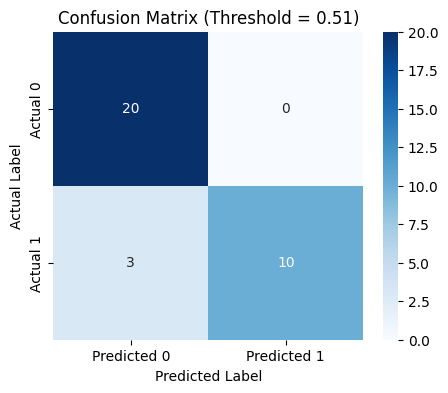

<function matplotlib.pyplot.show(close=None, block=None)>

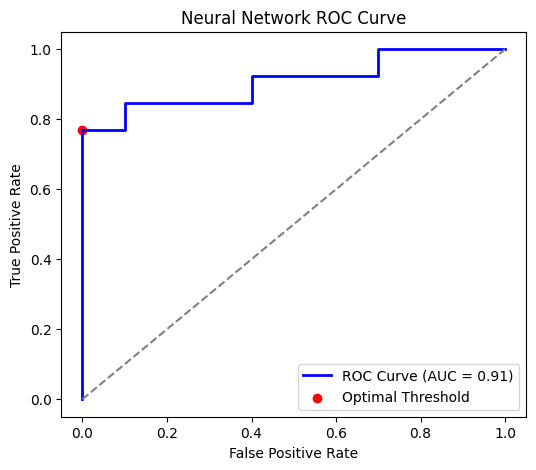

In [35]:
#Réseau neurone simple à une couche d'entrée et une couche de sortie appliqué sur 200 epocs.

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# On tranche les donnée en Train & Test (0.7/0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Converting les données en format PyTorch Tensors pour efficacité
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# ---- Définition du réseau neurone ---- #
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)  # sortie

# Initialiser le réseau neurone.
model = SimpleNN(input_size=X_train.shape[1])  # On utilise les données d'entrées de X_Train
criterion = nn.BCELoss()  # On utilise le Cross-Entropy Loss comme critère pour mesurer la performance du réseau neurone.
optimizer = optim.Adam(model.parameters(), lr=0.001) #minimization de la perte.

# ---- Entrainement du réseau neurone. ---- #
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ---- Entrainement du réseau neurone et calculs des valeurs métriques ROC. ---- #
model.eval()
with torch.no_grad():
    y_scores = model(X_test_tensor).numpy().flatten()
    y_true = y_test_tensor.numpy().flatten()

# ---- Calcul du ROC et trouver le seuil (threshold) optimal ---- #
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Trouver le meilleur seuil (threshold) avec Youden’s J-Index (maximiser (TPR - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Youden's J-Index): {optimal_threshold:.4f}")

# ---- Compare les matrices des différentes seuil (Thresholds) ---- #
thresholds_to_test = [optimal_threshold]  # Test du seuil optimal (thresholds) et calculer les predictions avec la matrice de confusion.

for threshold in thresholds_to_test:
    y_preds = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()

    print(f"\nThreshold: {threshold:.2f}")
    print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

    plt.figure(figsize=(5,4))
    sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix (Threshold = {threshold:.2f})")
    plt.show()

# ---- Visionalizer la courbe ROC ---- #
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label="Optimal Threshold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.legend()
plt.show

In [ ]:
import pickle

# Save the model to a file
with open("model_nn.pkl", "wb") as f:
    pickle.dump(model, f)

**Attention**: Le reste du code était un essai de deployer FastAPI à l'interieur de Google Colab. il m'est devenu apparent après essaies et recherche que celà n'est pas possible. La limite de l'environment Google Colab atteinte, j'ai brancher avec Python strictement(eg .py) avec Streamlit et Flask.  Mais, après quelques heures d'effort et puisque l'obectif du projet est de concevoir au minimun un réseau neurones, j'ai ré-orienté mes efforts vers le développement du réseau neurones et sauvegarder les modèles ci-haut (model.pkl et model_SVC.pkl).  


**Important**: J'ai aussi pris soin de ne pas inclure l'application conçu avec FastAPI (App.py), elle fut donc supprimée.  J'ai opter de garder le code ci-bas pour référence future, s'il a lieu ou intérêt.


**Donc, il est donc avisable d'ignorer le reste du code et vous dirigez vers le prochain notebook intituler SNN_ROC.ipynb.**, implémentation d'un réseau neurones simple.

In [ ]:
pip install fastapi fastapi[standard] uvicorn pydantic-settings


In [ ]:
!fastapi run ./main.py

]11;?\]10;?\
   FastAPI   Starting production server 🚀
 
             Searching for package file structure from directories with __init__.py files
 
             Path does not exist main.py

